In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#import ensemble method form sklearn

In [6]:
from sklearn.ensemble import RandomForestClassifier,\
    AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

In [7]:
train = pd.read_csv('/Users/ben/Documents/datasets/titanic/train.csv')
test = pd.read_csv('/Users/ben/Documents/datasets/titanic/test.csv')

In [10]:
PassengerId = test.PassengerId
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [43]:
full_data = [train, test]
# add some featuer
# give the lengt of the name
for data in full_data:
    data['FamilySize'] = data['SibSp'] + data['Parch'] +1
    data.IsAlone = 0
    data.loc[data['FamilySize']==1,'IsAlone'] =1
    data.Embarked = data.Embarked.fillna('S')
    data.Fare.fillna(data.Fare.median())
    age_null_count = data.Age.isnull().sum()
    age_null_list = np.random.randint(data.Age.mean()-data.Age.std(),\
                                     data.Age.mean()+data.Age.std(),
                                     size=age_null_count)
    
    

In [48]:
X = train.loc[:,['Sex','Age','Pclass']]
X_test = test.loc[:,['Sex','Age','Pclass']]
y = train.loc[:,'Survived']

In [68]:
X.Age = X.Age.fillna(X.Age.mean())
X_test.Age = X_test.Age.fillna(X.Age.mean())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.Sex = le.fit(X.Sex).transform(X.Sex)
X_test.Sex = le.fit_transform(X_test.Sex)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

     Sex        Age  Pclass
445    1   4.000000       1
650    1  29.699118       3
172    0   1.000000       3
450    1  36.000000       2
314    1  43.000000       2


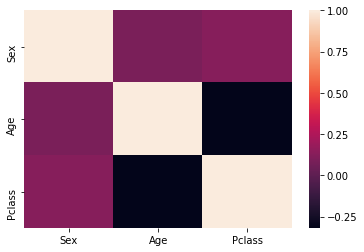

In [72]:
print(x_train.head())
sns.heatmap(x_train.corr())

In [74]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.grid_search import GridSearchCV
start = time.clock()
entropy_thresholds = np.linspace(0, 1, 50)
gini_thresholds = np.linspace(0, 0.1, 50)
#设置参数矩阵：
param_grid = [{'criterion': ['entropy'], 'min_impurity_decrease': entropy_thresholds},
              {'criterion': ['gini'], 'min_impurity_decrease': gini_thresholds},
              {'max_depth': np.arange(2,10)},
              {'min_samples_split': np.arange(2,20)},
              {'n_estimators':np.arange(2,20)}]

clf = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
clf.fit(x_train,y_train)
print("timecost",time.clock() - start)
print('best params {0}\n best score:{1}'.format(clf.best_params_,clf.best_score_))

timecost 8.374172000000002
best params {'criterion': 'gini', 'min_impurity_decrease': 0.0020408163265306124}
 best score:0.812199036918138


In [77]:
from sklearn import  metrics
clf = RandomForestClassifier(min_samples_split=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("训练集得分:", clf.score(x_train, y_train))
print("测试集得分:", clf.score(x_test, y_test))
print("查准率:", metrics.precision_score(y_test, y_pred))
print("召回率:", metrics.recall_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))


训练集得分: 0.8635634028892456
测试集得分: 0.8097014925373134
查准率: 0.7884615384615384
召回率: 0.7387387387387387
F1_score: 0.7627906976744186


In [80]:
from sklearn.ensemble import BaggingClassifier
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("训练集得分:", clf.score(x_train, y_train))
print("测试集得分:", clf.score(x_test, y_test))
print("查准率:", metrics.precision_score(y_test, y_pred))
print("召回率:", metrics.recall_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))


训练集得分: 0.8667736757624398
测试集得分: 0.8059701492537313
查准率: 0.797979797979798
召回率: 0.7117117117117117
F1_score: 0.7523809523809525


In [83]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("训练集得分:", clf.score(x_train, y_train))
print("测试集得分:", clf.score(x_test, y_test))
print("查准率:", metrics.precision_score(y_test, y_pred))
print("召回率:", metrics.recall_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))


训练集得分: 0.8154093097913323
测试集得分: 0.7985074626865671
查准率: 0.7878787878787878
召回率: 0.7027027027027027
F1_score: 0.7428571428571429
